### <a/ id='top'></a>
# Homework 3: Random Variables, and the Central Limit Theorem
***

**Name**: Chakrya Ros


***

This assignment is due on Canvas by **5 PM on Monday March 18**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- You **MUST** leave all of your notebook cells **evaluated** so the graders do not need to re-evaluate them. For 100+ students, this extra time adds up, and makes the graders' lives unnecessarily more difficult.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) 

---

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import math
from scipy.special import binom
import matplotlib.pylab as plt
%matplotlib inline

<br>

---
<a/ id='p1'></a>
[Back to top](#top)

<img src="https://media.daysoftheyear.com/20171223112636/hedgehog-day1.jpg" style="width: 500px;"/>


### [25 points] Problem 1

Suppose you are modeling the probability of observing various levels of cuteness in hedgehogs you encounter.  Let $X$ be a random variable representing the observed cuteness, which is *obviously* nonnegative and has units of deci*awws*. You decide to use the following pdf for $X$:

$$
f(x) = \begin{cases}
         c \ x \ e^{\left(-\frac{x^2}{4}\right)} & 0 \leq x < \infty \\
         0                           & \text{otherwise}
       \end{cases}
$$
where $c$ is some normalizing constant.

**Part A**: Determine the value of $c$ such that $f(x)$ is a valid probability density function. Then, make a plot of the probability density function for hedgehog cuteness, $f(x)$. Be sure to label your axes!

**Part A Solution**: 

We need to choose $c$ such that $f(x)$ integrates to 1.  We have:

$\begin{align}
 1 &= \int_0^\infty c \ x \ e^{-x^2/4}\ dx \qquad \text{let } u=x^2, du = 2xdx\\
   &= \dfrac{c}{2} \int_0^\infty e^{-u/4}\ du \\
   &= -\dfrac{4c}{2} e^{-u/4} \bigg|_0^\infty \\
   &= -2c \left(e^{-\infty} - e^0\right) \\
   &= -2c \left(0 - 1\right) \\
   &= 2c \\
\Rightarrow& ~~\fbox{$c=\dfrac{1}{2}$}
\end{align}$

Text(0, 0.5, 'Density')

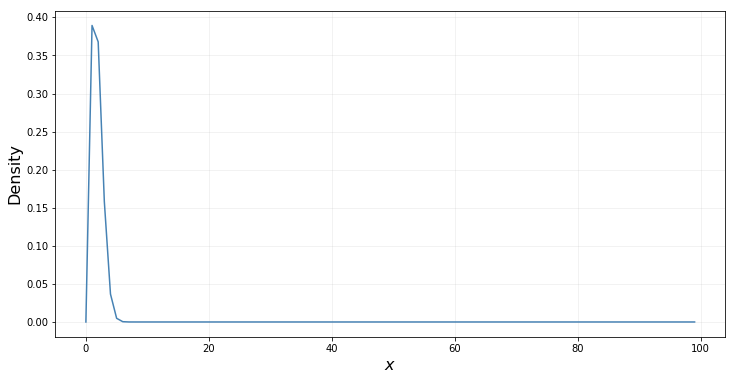

In [2]:
def pdf_fun(x):
    result = (1/2)*x*np.exp(-(x**2)/4)
    return result
x = 100
pdf = np.zeros(100)
for i in range(x):
    pdf[i] = pdf_fun(i)



fig,ax = plt.subplots(1,1,figsize=(12,6))
ax.plot(pdf, color="steelblue",)
ax.grid(alpha=0.2)
ax.set_xlabel(r"$x$", fontsize=16)
ax.set_ylabel("Density", fontsize=16)
#ax.legend()
#ax.set_xlim((-10,10))
#ax.set_xticks(range(-10,11));

**Part B**: Compute *by hand* the cumulative density (cdf) function $F(x)$ for $X$.

**Part B Solution**:

Integrating from $0$ to $x$, we have

$\begin{align}
F(x)  &= \int_0^x \dfrac{1}{2} \ y \ e^{-y^2/4}\ dy \qquad \text{let } u=y^2, du = 2ydy\\
   &= \dfrac{1}{4} \int_0^{x^2} e^{-u/4}\ du \\
   &= -\dfrac{4}{4} e^{-u/4} \bigg|_0^{x^2} \\
   &= -1 \left(e^{-x^2/4} - e^0\right) \\
   &= \left(1 - e^{-x^2/4}\right) \\
\Rightarrow& ~~\fbox{$F(x)=(1 - e^{-x^2/4})$}
\end{align}$

**Part C:**  Use the cdf you derived in **Part B** to calculate the median ($\tilde{x}$) cuteness of all hedgehogs.

 **Part C Solution:**

Median is the middle of probability mass, so we have,

$\begin{align}
\frac{1}{2} &= \int_0^x \dfrac{1}{2} \ y \ e^{-y^2/4}\ dy \qquad \text{let } u=y^2, du = 2ydy\\
            &= \dfrac{1}{4} \int_0^{x^2} e^{-u/4}\ du \\
            &= -\dfrac{4}{4} e^{-u/4} \bigg|_0^{x^2} \\
            &= -1 \left(e^{-x^2/4} - e^0\right) \\
            &= \left(1 + e^{-x^2/4}\right) \\
 e^{-x^2/4} &= \frac{1}{2} \qquad \text{take log both sides} \\
 \log e^{-x^2/4} &= \log \frac{1}{2}  \\
 \frac{-x^2}{4} \log e &= \log \frac{1}{2} \qquad \text{take log e = 1 and log 1/2 = -log 2} \\
 -x^2       &= - 4 \log 2 \\
\Rightarrow& ~~ \fbox{$\tilde{x} = \sqrt{4 \log{2}} \approx 1.6651 $}
\end{align}$


In [3]:
print(np.sqrt(4*np.log(2)))

1.6651092223153954


**Part D**: It is a well-known fact that any hedgehog whose cuteness exceeds 3 deciawws is **totes adorbz**. Use the cdf you computed in **Part B** to find the probability that any arbitrary hedgehog that you observe is totes adorbz.

**Part D Solution:**

$\begin{align}
P(X \geq 3) &= 1 - P(X \leq 3) = 1 - F(3) \\
            &= 1 - \left[1-e^{(-3^2/4)}\right] \\
            &= e^{(-2.25)} \\
            &\approx 0.1054
\end{align}$

The probability that hedgehog is about $\fbox{0.1054}$

In [4]:
a = (3**2)/4
print(a)
np.exp(-a)

2.25


0.10539922456186433

**Part E:** You have been painstakingly collecting data on hedgehogs all over town, and the cuteness is damn near overwhelming. Suppose you sample 5 hedgehogs, and the cuteness of any given hedgehog is independent of the cuteness of all other hedgehogs. What is the probability that more than half of them are totes adorbz? Keep at least 5 decimal places in your answer.

In [5]:
def binomial (c,k, n, p):
    b = c*(p**k)*(1-p)**(n-k)
    return b
c_3 = (5*4*3)/(3*2*1)
c_4 = (5*4*3*2)/(4*3*2*1)
c_5 = 1
p = 0.1054
totes_3 = binomial(c_3, 3, 5,p)
totes_4 =  binomial(c_4, 4, 5,p)
totes_5 = binomial(c_5, 5, 5,p)
total_totes = totes_3 + totes_4 + totes_5
print("The probability that more than half of them are totes adorbz:", total_totes)

The probability that more than half of them are totes adorbz: 0.0099358997582827


In [6]:
p = 0.1054
prob_3 = binom(5, 3) * (p**3) * ((1-p)**(5-3)) 
prob_4 = binom(5, 4) * (p**4) * ((1-p)**(5-4)) 
prob_5 = binom(5, 5) * (p**5) * ((1-p)**(5-5)) 
Prob_3_up = prob_3 + prob_4 + prob_5
print("The probability that more than half of them are totes adorbz:{:0.5f}".format(Prob_3_up))

The probability that more than half of them are totes adorbz:0.00994


**Part E Solution:**

The probability that more than half of them are totes adorbz: $\fbox{0.00994}$

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
### [25 points] Problem 2 - Monte Carlo Estimation of Definite Integrals

One really cool application of random variables is using them to approximate integrals/area under a curve.  This method of approximating integrals is used frequently in computational science to approximate really difficult integrals that we never want to do by hand.  In this exercise you'll figure out how we can do this in practice and test your method on a relatively simple integral. 

**Part A.**  Let $X$ be a random variable representing how delicious a pie you bake is, as measured by the **Deliciousness Index** (DI).  Suppose the probability density function for $X$ is described by the raised cosine probability density function:

$$
f(x) = \begin{cases}
         \dfrac{1}{\pi}\left(\cos{(x)} + 1\right) & 0 \leq x \leq \pi \\
         0                           & \text{otherwise}
         \end{cases}
$$

A Deliciousness Index of $\pi$ is the most delicious pie you can ever hope to create, and a DI of $0$ is the most disgusting pie you have ever tasted.  

Compute **by hand**, the integral of $f(x)$ for $0 \leq x \leq \dfrac{\pi}{2}$.  Write a sentence or two to interpret your result physically, in the context of this problem set-up.

**Part A Solution:**

Integrating from $0$ to $\dfrac{\pi}{2}$, we have

$\begin{align}
f(x)  &= \int_0^{\pi /2} \dfrac{1}{\pi} (cos(x) + 1)\ dx \\
   &= \dfrac{1}{\pi} \int_0^{\pi/2} (cos(x) + 1)\ dx \\
   &= \dfrac{1}{\pi}(sin(x) + x) \bigg|_0^{\pi/2} \\
   &= \dfrac{2 + \pi}{2\pi} \\
\Rightarrow& ~~\fbox{$f(x)=0.8183$}
\end{align}$

In [7]:
a = np.pi + 2
b = 2 * np.pi
print(a/b)


0.8183098861837906


In [8]:
def integrate_f(f, a, b, N):
    h = float(b-a)/N
    area = 0.5*f(a) + 0.5*f(b)
    for i in range(1, N):
        area += f(a + i*h)
    area *= h
    return area
v = lambda x: (1/np.pi)*(np.cos(x) +1)
print(integrate_f(v, 0, np.pi/2, 100))

0.8183033411721806


**Part B.** Suppose we sample a random variable $X$ from $U(0,\frac{\pi}{2})$ and another random variable $Y$ from $U(0,1)$ and think of them as $x$- and $y$-coordinates of a point in the box $[0,\frac{\pi}{2}] \times [0,1]$.  If we compute the ratio of points that fall under the curve $f(x)$ to the total points sampled, what does this value estimate? 

**Part B Solution:**

Integrating from 0 to $\frac{\pi}{2}$ , we have X = 0.8183

Integrating from 0 to $1$, we have:

$\begin{align}
Y  &= \int_0^{1} \dfrac{1}{\pi} (cos(x) + 1)\ dx \\
   &= \dfrac{1}{\pi} \int_0^{1} (cos(x) + 1)\ dx \\
   &= \dfrac{\pi}{2}(sin(x) + x) \bigg|_0^{1} \\
   &= \dfrac{sin(1) + 1}{\pi} \\
\Rightarrow& ~~\fbox{$f(x)=0.5861$}
\end{align}$

Total points sample = X * Y = 0.8183 * 0.5861 = 0.4796

The ration of points that fall under the curve f(x):

raito_X = $\dfrac{0.8183}{ 0.4796} = 1.706$

raito_Y = $\dfrac{0.5861}{ 0.4796} = 1.222$

$$\fbox{This value estimate proportion of the area in the box that is under the curve of f(x)}$$


In [9]:
#np.sin(np.pi/2)
X = 0.8183
v = lambda y: (1/np.pi)*(np.cos(y) +1)
Y = integrate_f(v, 0, 1, 100)
print("Y=",Y)
# Y_1= (np.sin(1) + 1)/np.pi
# print(Y_1)
total_points = X*Y
print(total_points)
print(X/total_points)
print(Y/total_points)

Y= 0.5861561875101228
0.47965160823953346
1.7060299307728972
1.2220457045093487


**Part C.** How could we modify the process outlined in **Part B** so that our estimator estimates the value of the desired integral?  If you need inspiration, check out the in-class notebook on Stochastic Simulation (#4), specifically, the exercise where we estimated $\pi$!

**Part C Solution:**

We want to compute the area under the curve so we multiply the proportion by the total area to get the area under the curve.

**Part D.** Complete the function `integrate` below to compute an approximation to the definition integral $\int_0^{\text{ub}} f(x)dx$.  Your function should take as arguments:
1. `num_samples` -- the number of points to sample,
2. `ub` -- a number between $0$ and $\pi$ that is the upper bound of the integral, and
3. `isPlot` -- a Boolean flag for whether or not to display a plot of the results.

Your function should return an approximation of the definite integral by sampling $X$ from $U(0,\text{ub})$ and $Y$ from $U(0,1)$. For each random draw $(X,Y)$, define the random variable $Z$ that represents whether or not the sampled $Y$ value is less than $f(X)$ for the corresponding $X$ value.

Your function should perform three tasks: 

1. return the estimate of the value of the integral,
2. return the sample variance of the random variable $Z$ being simulated, using the np.var function, and
3. if `isPlot` is True, plot the curve $f(x)$ as well as the location of the points $(X,Y)$, colored according to whether they fall above or below the curve. 

(0.7822565707438585, 0.2499959999999999)

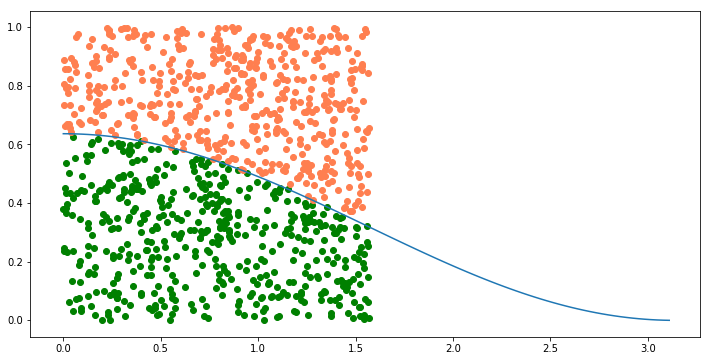

In [10]:
def function_cosine(x):
    return (1/np.pi)*(np.cos(x)+1)


# GIVEN CODE - Do not change the inputs/outputs or your code will fail unit tests and auto-grading!

def integrate(num_samples, ub, isPlot=False):
    
    #Draw samples from a uniform distribution
    X = np.random.uniform(0, ub, num_samples)
    Y = np.random.uniform(0, 1, num_samples)
    
    #calculate the f(x)
    value_fx = function_cosine(X)
    
    #to check the sampled 𝑌 value is less than 𝑓(𝑋)
    random_Z = Y < value_fx
    
    #get estimate
    estimate = ub*np.sum(random_Z)/num_samples
    
    #calcualte the sample variance 
    sample_var = np.var(random_Z)
    if isPlot:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6)) 
        x_value = np.arange(0, np.pi, np.pi/100)
        ax.plot(x_value, function_cosine(x_value))
        ax.scatter(X[Y<=value_fx],Y[Y<=value_fx ],c='green')
        ax.scatter(X[Y>value_fx ],Y[Y>value_fx],c='coral')
    return estimate, sample_var
integrate(num_samples=1000, ub=(np.pi/2), isPlot=True)

**Part E.** Write your own small unit tests!

First, what should your `integrate` function output if you plug in `ub=0`? Set that as `int_0_to_0` below.

Second, what should your `integrate` function output if you plug in `ub=`$\pi$? Set that as `int_0_to_pi` below.

Then, you can execute the cell below to run two sanity checks. Write out **in math** (like, a definite integral) what each of these two tests is checking and **why** that is a reasonable sanity check.

If these two assertions run without fail, then things seem to be working okay. Note that the upper endpoint test is stochastic, so if it fails, try running it a few times. If it fails a lot, then things are probably going wrong.

**Part E Solution:**

A definite integral is an integral expressed as the difference between the values of the integral at specified upper and lower limits of the independent variable. These two test is checking the lower and upper limits bound of f(x) becasue we want to check to make sure it's not out of bound. When the lower bound is zero and upper bound is $\pi$, we got "error of upper endpoint test failing" because it's out of bound. However, When the lower bound is zero and upper bound is 1, sanity checks.

In [11]:
int_0_to_0  = 0 # fill this in!
int_0_to_pi = 1# this one too!


#---------------------------------------
# DO NOT EDIT THIS CELL BELOW HERE
#---------------------------------------
assert integrate(1000, 0, False)[0]==int_0_to_0, "Error: lower endpoint test failing"
assert math.isclose(integrate(10000, np.pi, False)[0],int_0_to_pi,abs_tol=0.03), "Error: upper endpoint test failing"

**Part F.** Run your simulation with `isPlot=True` and `ub=`$\frac{\pi}{2}$ for 1,000 samples so we can see your plot. Then, run your simulation (with `isPlot=False`) with at least 10,000 samples and estimate the value of the given integral. Be sure to leave your cells evaluated for the graders! Does your estimate agree with the exact value of the integral you computed in **Part A**? 

samples run at 1000: (0.8435176274888595, 0.24863099999999996)
samples run at least 100000: (0.8026769229921922, 0.249879)


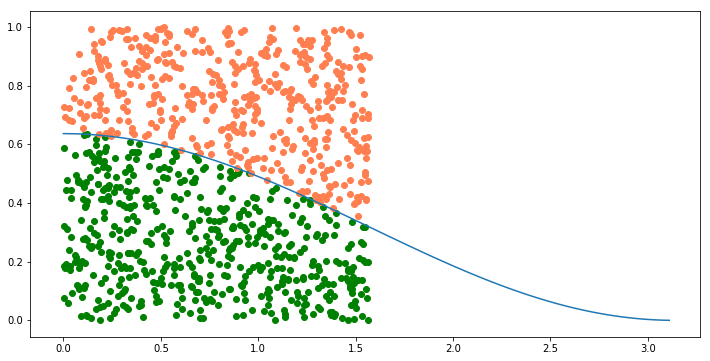

In [12]:
print("samples run at 1000:", integrate(1000, np.pi/2, isPlot=True))
    
print("samples run at least 100000:",integrate(10000, np.pi/2, isPlot=False))


**Part F Solution:**

yes, it's pretty close to my answer in part A.

To check the different:

error = $\dfrac{0.81524 - 0.8183}{0.8183} \approx -0.3739\% $
    

In [13]:
print(((0.81524 - 0.8183)/0.8183)*100)

-0.37394598557986836


<br>

---
<a/ id='p3'></a>
[Back to top](#top)
### [25 points] Problem 3 - Mmmm... Donuts...

<img src="http://astrokentico.s3.amazonaws.com/rojakdaily/media/1nichoras/homer%20simpson%20krispy%20kreme/main.jpg?ext=.jpg" style="width:300px;"/>

You bring many donuts (or _doughnuts_, if you're into that) to work to share with your coworkers at the Boulder Nuclear Power Planet. But due to the high levels of radiation there, they must be inspected for safety. In particular, if the mean level of radiation in a sample from your batch of donuts is above [200 mSv (millisievert)](#rad), then they are deemed unsafe and you must throw the whole batch away.

You know that historically donuts at the power plant have, on average, 190 mSv of radiation, with a standard deviation of 40 mSv. To test the donut radiation levels, you take the donut receipt and pick every fifth donut off it, and sample the radiation levels of those donuts. You end up sampling the radiation levels of 36 donuts out of the batch.

**Part A.** What is the probability that a donut batch is deemed unsafe?  You should at the very least set up and justify your calculation by hand (in Markdown/Mathjax), before executing any calculations in Python.

**Part A Solution:**


Let X be the random variable that represent the level of radiation in the donut batch.

we know $\mu = 190$ mSv, $\sigma = 40$ mSv, and $n=36$ donuts.

Central Limit Theorem: $\bar{X} \sim N(\mu, \frac{\sigma^2}{n}) = \bar{X} \sim N(190, \frac{40^2}{36})$
$$\begin{align}
    P(\bar{X} > 200) &= P\left(Z > \dfrac{200-190}{\frac{40}{\sqrt{36}}}\right) \\
                     &= P(Z > 1.5) = 1 - P(Z \leq 1.5) \\
                     &= 1 - \Phi(1.5) = 1 - 0.93319  \\
                     &= \fbox{0.0668}  \\
\end{align}$$

In [14]:
demo = 40/6
print((200-190)/demo)
print(1-stats.norm.cdf(1.5))

1.5
0.06680720126885809


In [15]:
mu = 190
sigma = 40
n = 36
prob = 1 - stats.norm.cdf((200-mu)/(40/np.sqrt(36)))

print(prob)

0.06680720126885809


**Part B.** You really do not want to throw away donuts that frequently, so you propose to store the donuts in a lead-lined donut box. But lead also is not very good for your health, so you are motivated to use the least amount of lead possible. What is the minimum mean amount of radiation $\mu$ for our donuts to have such that the probability that we will throw donuts out due to safety concerns is at most 0.01?

Calculate this **by hand**, using Python only to perform arithmetic operations and compute critical values of a standard normal random variable.

**Part B Solution:**

$P(\bar{X} > 200)$ at most $0.01$

we know that 

$$P(\bar{X} > 200) = 1 - P\left(Z \leq \dfrac{200-190}{\frac{40}{\sqrt{36}}}\right) = 0.01 $$
$$ => P\left(Z \leq \dfrac{200-190}{\frac{40}{\sqrt{36}}}\right) = 1 - 0.01 = 0.99$$

In [16]:
z_critical_val = stats.norm.ppf(0.99)
print(z_critical_val)

2.3263478740408408


$$Z = \dfrac{200 - \mu}{\sigma/ \sqrt{n}}$$
$$ 200 - \mu = Z \cdot \frac{\sigma} {\sqrt{n}} $$
$$=> \mu = 200 - Z \cdot \frac{\sigma} {\sqrt{n}} = 200 - 2.3263 \cdot \frac{40} {\sqrt{36}}$$
$$ \mu = \fbox{184.5 mSv} $$

In [17]:
mu_new = (200 - (stats.norm.ppf(0.99) * (40/np.sqrt(36))))
print(mu_new)



184.49101417306105


**Part C.**  Your supervisor at the plant decides that serving up donuts in a lead-lined box is a bad idea. Fair enough.

But she is still imposing the requirement that the probability of a batch of donuts being rejected must be less than 0.01. Suppose the mean and standard deviation are at their original values of $\mu = 190$ mSv and $\sigma = 40$ mSv. What is the minimum sample size to satisfy this requirement?

Calculate this **by hand**, using Python only to perform arithmetic operations and compute critical values of a standard normal random variable.

**Part C solution:**

To calculate we use the same formulate to find critical values of a standard normal random variable

$$P(\bar{X} > 200) = 1 - P\left(Z \leq \dfrac{200-190}{\frac{40}{\sqrt{36}}}\right) = 0.01 $$
$$ => P\left(Z \leq \dfrac{200-190}{\frac{40}{\sqrt{36}}}\right) = 1 - 0.01 = 0.99$$

$$Z = \dfrac{200 - 190}{40/ \sqrt{n}}$$

$$ 10 = Z \cdot \frac{40} {\sqrt{n}} $$

$$=> \sqrt{n} = \frac{Z \cdot 40} {10} = \frac{2.3263 \cdot 40} {10}$$

$$ n= (9.3054)^2 = \fbox{86.59} $$

In [18]:
new_std_normal_rv = (stats.norm.ppf(0.99) * 40)/10
print(new_std_normal_rv)
print((new_std_normal_rv)**2)

9.305391496163363
86.59031089686943


**Part D.** Can you think of any potential issues with using a normal distribution to model the radiation content of our donuts?

**Part D Solution:**

The potential issues with using a normal disbrution to model the radiation content of our donuts, we would get the some probability mass over donut radiation nagative because with a lower mean.

<br>

---
<a/ id='p4'></a>
[Back to top](#top)
### [25 points] Problem 4 - Here come the hedgehogs

**Part A:** You are conducting a study of the cuteness of hedgehogs, because you want to verify the calculations from Problem 1. You set up a data collection center, and record in your data set the time when each hedgehog arrives at your site. The data are found in `arrivals.csv`.

Load these data into a Pandas DataFrame, compute the time span between successive hedgehog arrivals, and plot a density histogram of those inter-hedgehog arrival times.

To best capture the majesty of the mighty hedgehog, your histogram boxes should be `sienna` with `khaki` edges. Your histogram should also have 50 bins, because hedgehogs love histograms with 50 bins. Hedgehogs are illiterate, so they don't really care about axis labels, but your instructor does. So, be sure to label your axes too.

Text(0, 0.5, 'density')

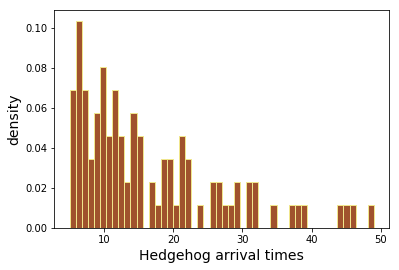

In [19]:
x = pd.read_csv('arrivals.csv')
inter_hed = np.diff(x['hedgehogs'])
fig,ax = plt.subplots(1,1, figsize=(6,4)) 
ax.hist(inter_hed,bins=50, 
        density=True,color="sienna",edgecolor="khaki")
ax.set_xlabel('Hedgehog arrival times',FontSize=14)
ax.set_ylabel('density',FontSize=14)
#ax.legend()

**Part B:** Compute a 99% confidence interval (to 4 decimal places) for the mean of the inter-hedgehog arrival time. If you use any theorem(s) in your calculation, be sure to state what they are and why the theorem(s) can be applied. 

In [20]:
z_half = (1-0.99)
n = len(inter_hed )
Z = stats.norm.ppf(1-0.01/2)
xbar = np.mean(inter_hed )
stdev = np.std(inter_hed )
print(" 99% Confidence interval: [{:.4f},{:.4f}]".format(xbar-Z*stdev/np.sqrt(n),xbar+Z*stdev/np.sqrt(n)))

 99% Confidence interval: [13.8282,19.2335]


**Part B Solution:**

$99\%$ Confidence interval: $[13.8282,19.2335]$

**Part C:** Speculate: what would happen if you hadn't included all the data in your confidence interval calculation above? Specifically, if you only observed the first 30 of your data points and used those to compute a confidence interval, would it be wider or less wide? Why? You may assume that the number of data points is the *only* thing changing in this hypothetical situation.

**Part C Solutions:**

yes, a normal distribution with a really wide standard deviation, or with a lower mean, would put some probability mass over donut radiation content which is negative. That does not make sense physically. We should not eat irradiated donuts.


**Part D:** Write a function to confirm what you have written above. For each value of $n$ between $30$ and the total number of data points, compute a 90% CI using the first $n$ inter-arrival times. Plot the CIs (vertical axis) against $n$ (horizontal axis). Plot the means as black X symbols, with vertical "errorbars" for the CIs colored `sienna`. See Matplotlib's [errorbar](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html) plot type. Be sure to label your axes!

Text(0.5, 1.0, 'Effect of Sample Size on 90% Confidence Intervals')

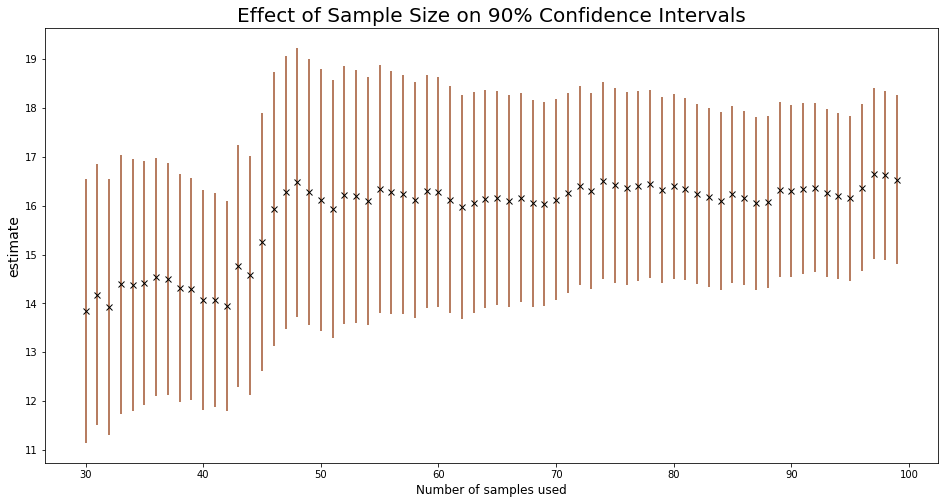

In [24]:
def CI_function(intern_hed, n):
    z_half = (1-0.90)
    z = stats.norm.ppf(1-z_half/2)
    #get data
    data =inter_hed[:n]
    xbar = np.mean(data)
    stdev = np.std(data)
    return xbar,z*stdev/np.sqrt(n) 
# x = np.linspace(100,1, 30)
num_sample = np.arange(30,len(inter_hed)+1)
xbars = []
widths = []
for n in num_sample:
    y, w = CI_function(inter_hed,n)
    xbars.append(y)
    widths.append(w)
    
fig,ax = plt.subplots(1,1, figsize=(16,8)) 
ax.errorbar(num_sample,xbars,yerr=widths,  fmt='kx',marker='x',
           color="black",ecolor='sienna')

ax.set_xlabel('Number of samples used',fontsize=12)
ax.set_ylabel('estimate',FontSize=14);
ax.set_title('Effect of Sample Size on 90% Confidence Intervals',fontsize=20)

**Part E:** Reflect on how your confidence intervals change as the sample sizes $n$ increase from 30 to about 100. Does this make sense? Write a few sentences to reflect on the behavior that you see in your plot from Part D, and why it does/does not make sense.

**Part E Solution:**

Increase the sample size decrease the width of confidence intervals because it decease the standard error. However, after reaching a certain sample size it is not really worth increasing our sample size any further. Increasing the sample size from 50 to 100, the confidence intervals is more acturate.

<br>

---
### Notes

<a/ id='rad'></a> 200 mSv is somewhere below Chernobyl levels of exposure, but more radiation than you would want with regard to potentially increasing your risk of cancer. It's probably too high, but it is a nice round number! More information [here](https://www.theguardian.com/news/datablog/2011/mar/15/radiation-exposure-levels-guide).

[Back to Problem 3](#p3)